<a href="https://colab.research.google.com/github/diogo-franco/IA-/blob/main/Lista1_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercícios de Aprendizado Supervisionado**

In [3]:
#Importando bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_text

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,precision_score


**Download Dataset** - [Crop recommendation data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/4GBWFV)

O dataset **Crop Recommendation Data** contém um total de 1697 amostras, referente as características de solo e condições ambientais para o crescimento de diversas culturas.

Os dados estão estruturados nas seguintes colunas:
*   N (Nitrogênio): Quantidade de nitrogênio no solo.
*   P (Fósforo): Quantidade de fósforo no solo
*   K (Potássio): Quantidade de potássio no solo
*   temperature (Temperatura): Temperatura ambiente em graus Celsius
*   humidity (Umidade): Umidade relativa do ar em porcentagem
ph: Valor de pH do solo
*   rainfall (Precipitação): Quantidade de precipitação em mm
*   label: A cultura recomendada para plantio, com base nas condições descritas


**Importante:** em *label*, temos os rótulos (classes) que representam diferentes culturas agrícolas: Rice (Arroz), Maize (Milho), Soyabeans (Soja), Beans (Feijão), Peas (Ervilhas), Groundnuts (Amendoins), Cowpeas (Feijão-caupi), Banana, Mango (Manga), Grapes (Uvas), Watermelon (Melancia), Apple (Maçã), Orange (Laranja), Cotton (Algodão) e Coffee (Café)

**Exercício 1 – Leitura Dataset**

Realize a leitura dos dados e exiba as informações gerais do dataset

Exiba quantas amostras existem por classe (label)


In [4]:
#Digite seu código aqui
#Mascara booleana para uma soma, em seguida, print de cada variável
df = pd.read_csv('/Crop_recommendation.tab', sep = '\t')

print(df)
rice = (df['label']=='rice').sum()
maize = (df['label']=='maize').sum()
soyabeans = (df['label']=='Soyabeans').sum()
beans = (df['label']=='beans').sum()
peas = (df['label']=='peas').sum()
groundnuts = (df['label']=='groundnuts').sum()
cowpeas = (df['label']=='cowpeas').sum()
banana = (df['label']=='banana').sum()
mango = (df['label']=='mango').sum()
grapes = (df['label']=='grapes').sum()
watermelon = (df['label']=='watermelon').sum()
apple = (df['label']=='apple').sum()
orange = (df['label']=='orange').sum()
cotton = (df['label']=='cotton').sum()
coffee = (df['label']=='coffee').sum()
print('Rice:', rice)
print('Maize:', maize)
print('Soyabeans:', soyabeans)
print('Beans:', beans)
print('Peas:', peas)
print('Groundnuts:', groundnuts)
print('Cowpeas:', cowpeas)
print('Banana:', banana)
print('Mango:', mango)
print('Grapes:', grapes)
print('Watermelon:', watermelon)
print('Apple:', apple)
print('Orange:', orange)
print('Cotton:', cotton)
print('Coffee:', coffee)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
1692  117  86  48    28.695620  82.541958  6.225225  116.161684  banana
1693  114  94  53    26.335449  76.853201  6.190757  118.685826  banana
1694  110  78  50    25.937302  78.898644  5.915569   98.217475  banana
1695   94  70  48    25.136865  84.883944  6.195152   91.464425  banana
1696   80  71  47    27.505277  80.797840  6.156373  105.077699  banana

[1697 rows x 8 columns]
Rice: 139
Maize: 119
Soyabeans: 130
Beans: 125
Peas: 100
Groundnuts: 100
Cowpeas: 122
Banana: 130
Mango: 100
Gr

**Exercício 2 – Preparação dos Dados, divisão treinamento e testes**

Realize a divisão dos dados em treinamento e testes

In [5]:
#Digite seu código aqui
#Separa os dados de treinamento e teste
Tam_teste = 0.2 #tamanho dos dados de teste 20%
Random_state = 45 #fator para gerar os numeros pseudo-aleatórios
from sklearn.model_selection import train_test_split
test_df, train_df = train_test_split(df, test_size=Tam_teste, random_state=Random_state)
print(train_df)
print(test_df)


        N    P    K  temperature   humidity        ph    rainfall       label
1066  120    7   47    24.247825  83.036879  6.653868   54.765762  watermelon
1268   37   23   12    31.526760  90.506218  6.395258  113.116940      orange
1043  107    5   52    26.663461  89.984052  6.881426   57.408472  watermelon
1169    3  141  197    21.981419  91.127193  6.142803  115.478915       apple
1675  108   92   53    27.400536  82.962213  6.276800  104.937800      banana
...   ...  ...  ...          ...        ...       ...         ...         ...
228    54   77   85    17.141861  17.066243  7.829211   83.746067   Soyabeans
1241    0   23   15    22.566642  93.374889  7.598729  109.858575      orange
545    29   44   20    30.041323  63.562230  8.620108   31.831924  groundnuts
938    14  131  198    33.464116  83.867430  5.562791   67.922043      grapes
1070   97   22   50    26.260287  86.145859  6.769894   58.978788  watermelon

[340 rows x 8 columns]
        N    P    K  temperature   humid

**Exercício 3 – Treinamento do Modelo (pode ser o K-NN ou Decision Tree)**

Escolha um algoritmo da biblioteca Scikit-learn que seja adequado para treinar um modelo de recomendação de plantio a partir das variaveis presentes no conjunto de dados.

**Utilizando K-NN**

In [12]:
#Digite seu código aqui
#Utilizando o K-NN
from sklearn.neighbors import KNeighborsClassifier
neighbors = 5 #variável para selecionar quantos vizinhos mais próximos vou utilizar para a analise / bom ser impar para evitar empate
knn = KNeighborsClassifier(n_neighbors=neighbors)
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall','label']
X_train = train_df[['N','P','K', 'temperature','humidity','ph', 'rainfall']]
y_train = train_df['label']
X_test = test_df[['N','P','K', 'temperature','humidity','ph', 'rainfall']]
y_test = test_df['label']
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)

['apple' 'maize' 'grapes' ... 'cowpeas' 'peas' 'grapes']


<Axes: >

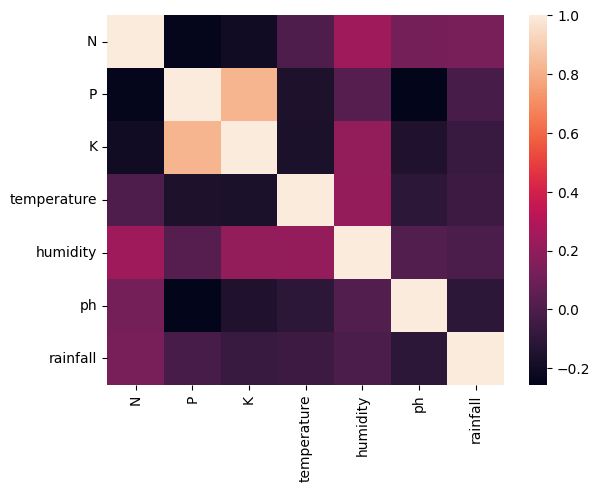

In [15]:
import seaborn as sns # importa seaborn e exibe um heatmap de correlação entre as variaveis do modelo
sns.heatmap(df.drop(axis=1,labels='label').corr())


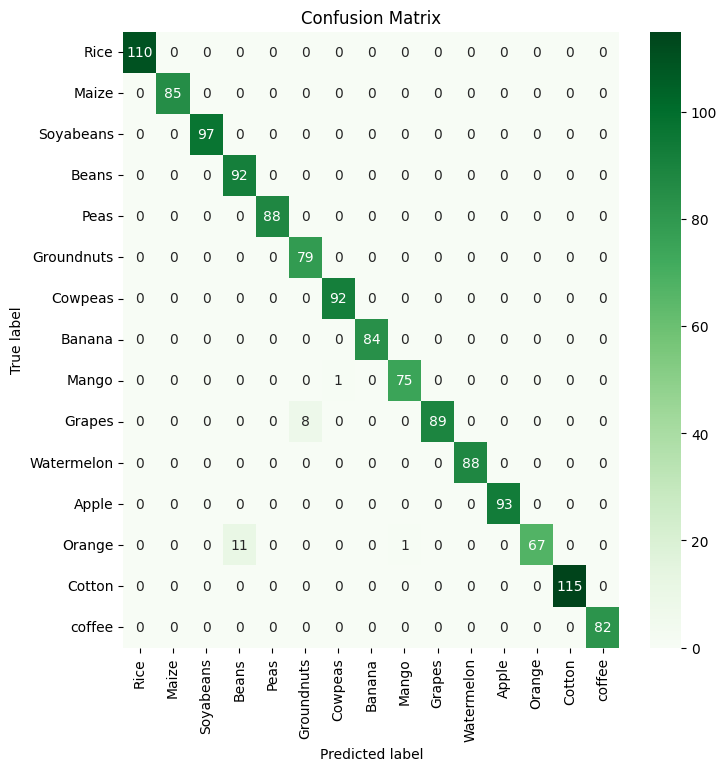

In [19]:
#Cria a matriz de confusão
labels = ['Rice', 'Maize', 'Soyabeans','Beans','Peas', 'Groundnuts','Cowpeas','Banana','Mango','Grapes','Watermelon','Apple','Orange','Cotton','coffee']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Exercício 4 – Avaliar o Modelo**

Utilize a métrica adequada para avaliar o modelo a partir dos dados de treinamento

In [17]:
from sklearn import metrics #Importa metrics e exibe as métricas do modelo
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

   Soyabeans      1.000     1.000     1.000       110
       apple      1.000     1.000     1.000        85
      banana      1.000     1.000     1.000        97
       beans      0.893     1.000     0.944        92
      coffee      1.000     1.000     1.000        88
      cotton      0.908     1.000     0.952        79
     cowpeas      0.989     1.000     0.995        92
      grapes      1.000     1.000     1.000        84
  groundnuts      0.987     0.987     0.987        76
       maize      1.000     0.918     0.957        97
       mango      1.000     1.000     1.000        88
      orange      1.000     1.000     1.000        93
        peas      1.000     0.848     0.918        79
        rice      1.000     1.000     1.000       115
  watermelon      1.000     1.000     1.000        82

    accuracy                          0.985      1357
   macro avg      0.985     0.983     0.983      1357
weighted avg      0.986   

A análise do desempenho do algoritmo de classificação tem como métrica principal o f1-score, pois oferece um equilíbrio entre precisão e recall, sendo crucial em cenários de múltiplas classes.

O algortmo demonstra um desempenho ótimo, com a maioria das classes alcançando um f1-score de 1.000.

Os valores de precisão e recall são consistentemente elevados, indicando a capacidade do algoritmo em identificar e classificar corretamente as instâncias.
A acurácia geral do modelo, 0.985, o quereforça a eficácia do algoritmo na classificação das categorias.


In [ ]:
#a pesquisar
#sklearn.ensemble testa várias técnicas de aprendizado de máquina